In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
corr=nx.DiGraph()

In [4]:
file=open("input.txt")
n,m=file.readline().replace("\n", "").split(" ")
q=file.readline().replace("\n", "").split(" ")
for i in range(len(q)): corr.add_node(i,color=q[i])
# adding FINAL node, with color WHITE
corr.add_node(len(q),color='W')

In [5]:
# setting starting vertices
R,L=file.readline().replace("\n", "").split(" ")
R=int(R)-1
L=int(L)-1

In [6]:
# making graph edges
for i in range(int(m)):
    line=file.readline().replace("\n", "").split(" ")
    corr.add_edge(int(line[0])-1,int(line[1])-1,color=str(line[2]))

In [7]:
# all colors, white for end node
colors=('B','R','Y','G','W')
# all layouts
layouts = ['bipartite_layout',
           'circular_layout',
           'kamada_kawai_layout',
           'random_layout',
           'rescale_layout',
           'shell_layout',
           'spring_layout',
           'spectral_layout',
           'fruchterman_reingold_layout']

In [8]:
def drawGraph(graph):
    # i want it black
    plt.style.use(['dark_background'])
    # size of plot
    plt.figure(figsize=(8,8),dpi=100)
    # set up position of graph items
    pos = nx.kamada_kawai_layout(graph)
        
    # draw nodes
    colored_nodes={}
    for color in colors:
        colored_nodes[color]=[]
    for node in graph.nodes():
        colored_nodes[graph.nodes[node]['color']].append(node)
    for col in colored_nodes:
        nx.draw_networkx_nodes(graph, pos,
                               nodelist=colored_nodes[col],
                               node_color=col, node_size=250, alpha=0.9)

    # draw edges
    colored_edges={}
    for color in colors:
        colored_edges[color]=[]
    for edge in graph.edges:
        colored_edges[graph.edges[edge]['color']].append(edge)
    for col in colored_edges:
        nx.draw_networkx_edges(graph, pos,
                               edgelist=colored_edges[col],
                               width=3, alpha=0.9, edge_color=col)
    # draw network labels
    labels={}
    for node in corr.nodes():
        # label according to PDF problem statement node labeling standard
        labels[node]=node+1  
    # the FINAL NODE is WHITE and labeled as END
    labels[len(graph.nodes())-1]='end'
    nx.draw_networkx_labels(graph, pos, labels, font_size=8, font_weight='bold')
    
    plt.axis('off')
    plt.show()

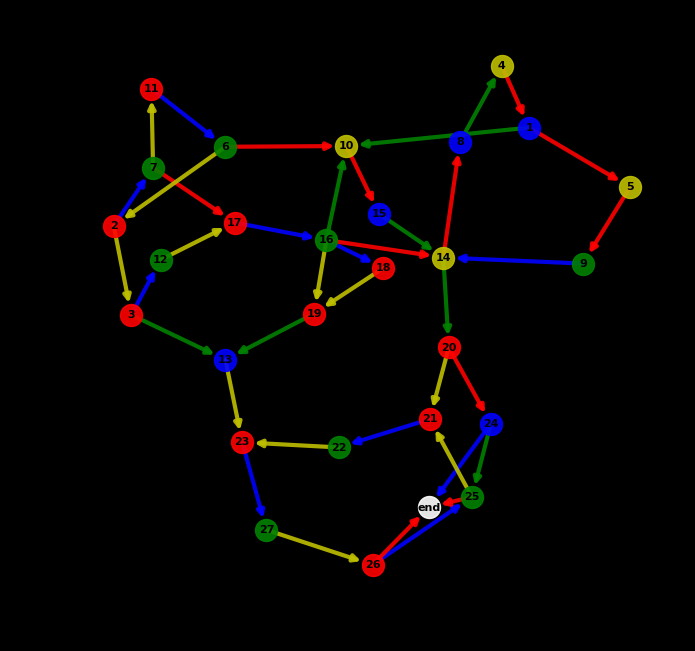

In [9]:
drawGraph(corr)